# **Previsão de Notas de alunos por meio de Árvore de Decisão**

### Definindo a base de dados e bibliotecas utilizadas
------------------------------------------------
* Importando as bibliotecas:

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import numpy as np
from matplotlib import pyplot as plt
import pydot
import graphviz
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

-------------------------------------------------------
* Carregamento das Bases de Dados 

In [2]:
df_mat = pd.read_csv("student-mat.csv")
df_por = pd.read_excel("student-por.xlsx")


In [3]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


--------------------------------
###  Analisando os dados:
* Matérias: Português e Matemática
* Atributos:

  * Sex: Female or Male;
  * Age: from 15 to 22;
  * Medu: Mother's education (from 0 to 4°);
  * Fedu: Father's education (from 0 to 4°);
  * Studytime: from 1 to 4;
  * Failures: n if 1<= n <= 3. else 4;
  * Schoolsup: School Support (binary yes or no);
  * Famsup: Family Support (binary yes or no);
  * Internet: binary yes or no;
  * Freetime: from 1 (very low) to 5 (very high);
  * Goout: from 1 (very low) to 5 (very high);
  * Walc: weekend alchool consumption (from 1 (very low) to 5 (very high));
  * Health: from 1 (very bad) to 5 (very good);

------------------------------------------------
* Criando coluna pelo sistema binário de classificação:


    |    pass    |    fail    |
    |  20 - 10   |   09 - 0   |


In [5]:
result_mat = []
result_por = []

for row in df_mat['G3']:
        if row >= 10:
          result_mat.append('pass')
        else:
          result_mat.append('fail')
df_mat['binaryClass'] = result_mat

for row in df_por['G3']:
        if row >= 10:
          result_por.append('pass')
        else:
          result_por.append('fail')
df_por['binaryClass'] = result_por

In [6]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,binaryClass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,pass


In [7]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,binaryClass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,pass
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,pass
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,pass


-----------------------------
### Construindo o algoritmo da árvore de decisão:
* É necessário deixar todos os atributos que usaremos em valores numericos

In [8]:
# for math
# for yes / no values:
d = {'yes': 1, 'no': 0}
df_mat['schoolsup'] = df_mat['schoolsup'].map(d)
df_mat['famsup'] = df_mat['famsup'].map(d)
df_mat['internet'] = df_mat['internet'].map(d)

# map the sex data
d = {'F': 1, 'M': 0}
df_mat['sex'] = df_mat['sex'].map(d)

# map the grades data
d = {'pass': 1, 'fail': 0}
df_mat['binaryClass'] = df_mat['binaryClass'].map(d)

In [9]:
# for portuguese
# for yes / no values:
d = {'yes': 1, 'no': 0}
df_por['schoolsup'] = df_por['schoolsup'].map(d)
df_por['famsup'] = df_por['famsup'].map(d)
df_por['internet'] = df_por['internet'].map(d)

# map the sex data
d = {'F': 1, 'M': 0}
df_por['sex'] = df_por['sex'].map(d)

# map the grades data
d = {'pass': 1, 'fail': 0}
df_por['binaryClass'] = df_por['binaryClass'].map(d)

* Formando os atributos preditivos que queremos

In [10]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,binaryClass
0,GP,1,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,0
1,GP,1,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0
2,GP,1,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1
3,GP,1,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1
4,GP,1,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,1


In [11]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,binaryClass
0,GP,1,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,1
1,GP,1,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,1
2,GP,1,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,1
3,GP,1,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,1
4,GP,1,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,1


- Filtrando os atributos desejáveis para construção da árvore

In [12]:
# Base de matemática
df_mat_ABIN = pd.DataFrame(df_mat, columns=['sex', 'age', 'Medu', 'Fedu', 'studytime', 'failures',
                                        'schoolsup', 'famsup', 'internet', 'freetime', 'goout',
                                        'Walc', 'health', 'G1', 'G2', 'binaryClass'])
df_mat_ABIN.head()

,sex,age,Medu,Fedu,studytime,failures,schoolsup,famsup,internet,freetime,goout,Walc,health,G1,G2,binaryClass
0,1,18,4,4,2,0,1,0,0,3,4,1,3,5,6,0
1,1,17,1,1,2,0,0,1,1,3,3,1,3,5,5,0
2,1,15,1,1,2,3,1,0,1,3,2,3,3,7,8,1
3,1,15,4,2,3,0,0,1,1,2,2,1,5,15,14,1
4,1,16,3,3,2,0,0,1,0,3,2,2,5,6,10,1


In [13]:
# Base de português
df_por_ABIN = pd.DataFrame(df_por, columns=['sex', 'age', 'Medu', 'Fedu', 'studytime', 'failures',
                                        'schoolsup', 'famsup', 'internet', 'freetime', 'goout',
                                        'Walc', 'health', 'G1', 'G2', 'binaryClass'])
df_por_ABIN.head()

,sex,age,Medu,Fedu,studytime,failures,schoolsup,famsup,internet,freetime,goout,Walc,health,G1,G2,binaryClass
0,1,18,4,4,2,0,1,0,0,3,4,1,3,0,11,1
1,1,17,1,1,2,0,0,1,1,3,3,1,3,9,11,1
2,1,15,1,1,2,0,1,0,1,3,2,3,3,12,13,1
3,1,15,4,2,3,0,0,1,1,2,2,1,5,14,14,1
4,1,16,3,3,2,0,0,1,0,3,2,2,5,11,13,1


- Removendo variável target (binaryClass) das nossas bases de dados

In [14]:
# Removendo binaryClass da base de matemática
df_student_mat = df_mat_ABIN.columns.tolist()
df_student_mat.remove('binaryClass')

In [15]:
# Removendo binaryClass da base de português
df_student_por = df_por_ABIN.columns.tolist()
df_student_por.remove('binaryClass')

------------------------------------------
### Gerando a árvore

* Para matemática

In [16]:
# Criando parâmetros da árvore passando variáveis preditoras e variável target
Xmat = df_mat_ABIN.drop(columns=['binaryClass'])
ymat = df_mat_ABIN['binaryClass']

In [17]:
# Separando dados de treino e de teste
Xmat_train, Xmat_test, ymat_train, ymat_test = train_test_split(Xmat, ymat, test_size=0.3, random_state=100)

-------------------------------------------
* O mesmo para português

In [18]:
# Criando parâmetros da árvore passando variáveis preditoras e variável target
Xpor = df_por_ABIN.drop(columns=['binaryClass'])
ypor = df_por_ABIN['binaryClass']

In [19]:
# Separando dados de treino e de teste
Xpor_train, Xpor_test, ypor_train, ypor_test = train_test_split(Xpor, ypor, test_size=0.3, random_state=100)

-------------------------------------------------

In [20]:
ymat_train.shape, ymat_test.shape

((276,), (119,))

In [21]:
ymat_train

59     1
337    0
23     1
88     1
335    1
      ..
343    0
359    1
323    1
280    0
8      1
Name: binaryClass, Length: 276, dtype: int64

In [22]:
ypor_train.shape, ypor_test.shape

((454,), (195,))

-----------------------------------------------
* Criando o classificador

In [23]:
# Treinando classificador de matemática
tree_mat_ABIN = tree.DecisionTreeClassifier(max_leaf_nodes=len(Xmat.columns), random_state=0)
tree_mat_ABIN.fit(Xmat_train, ymat_train)

DecisionTreeClassifier(max_leaf_nodes=15, random_state=0)

In [24]:
# Treinando classificador de português
tree_por_ABIN = tree.DecisionTreeClassifier(max_leaf_nodes=len(Xpor.columns), random_state=0)
tree_por_ABIN.fit(Xpor_train, ypor_train)

DecisionTreeClassifier(max_leaf_nodes=15, random_state=0)

### Verificando acurácia dos modelos classificadores

* Acurácia do classificador de matemática

In [40]:
predictions = tree_mat_ABIN.predict(Xmat_test)

In [42]:
print('{:.2f}%'.format(accuracy_score(y_true = ymat_test, y_pred = predictions)*100))

89.08%


* Acurácia do classificador de português

In [27]:
predictions = tree_por_ABIN.predict(Xpor_test)

In [37]:
print('{:.2f}%'.format(accuracy_score(y_true = ypor_test, y_pred = predictions)*100))

91.79%


## Imprimindo árvores

### Árvore de Matemática

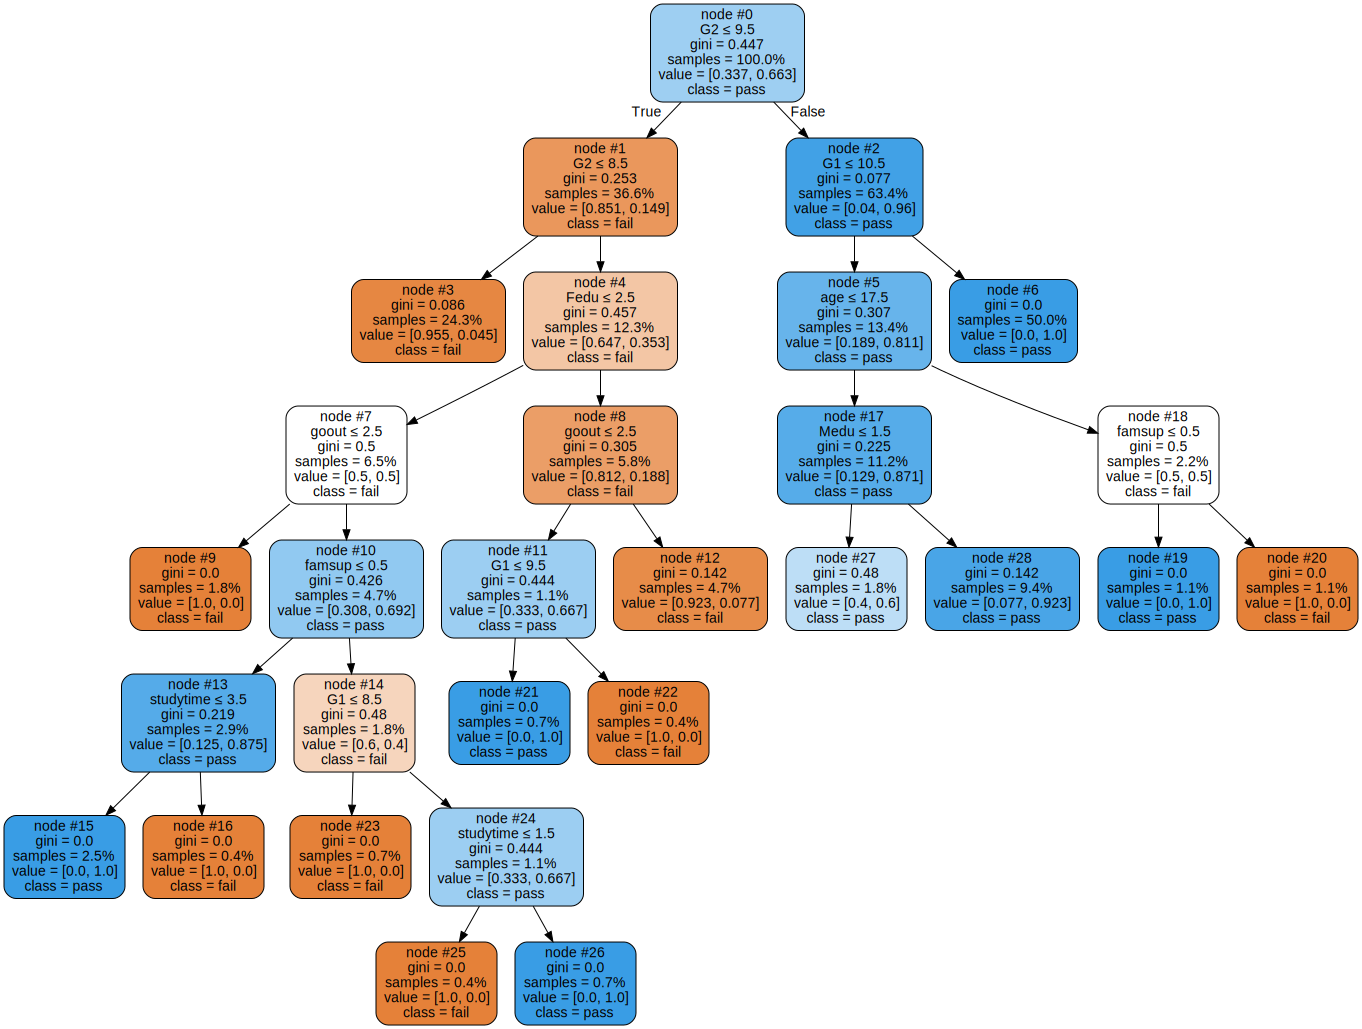

In [29]:
# Imprime graficamente a árvore de matemática
dot_data = export_graphviz(tree_mat_ABIN, 
                          out_file = None,
                          feature_names = df_student_mat,
                          class_names = ['fail', 'pass'],
                          filled = True, rounded = True,
                          proportion = True,
                          node_ids = True,
                          rotate = False,
                          label = 'all',
                          special_characters = True)
graph = graphviz.Source(dot_data)
graph

### Árvore de Português

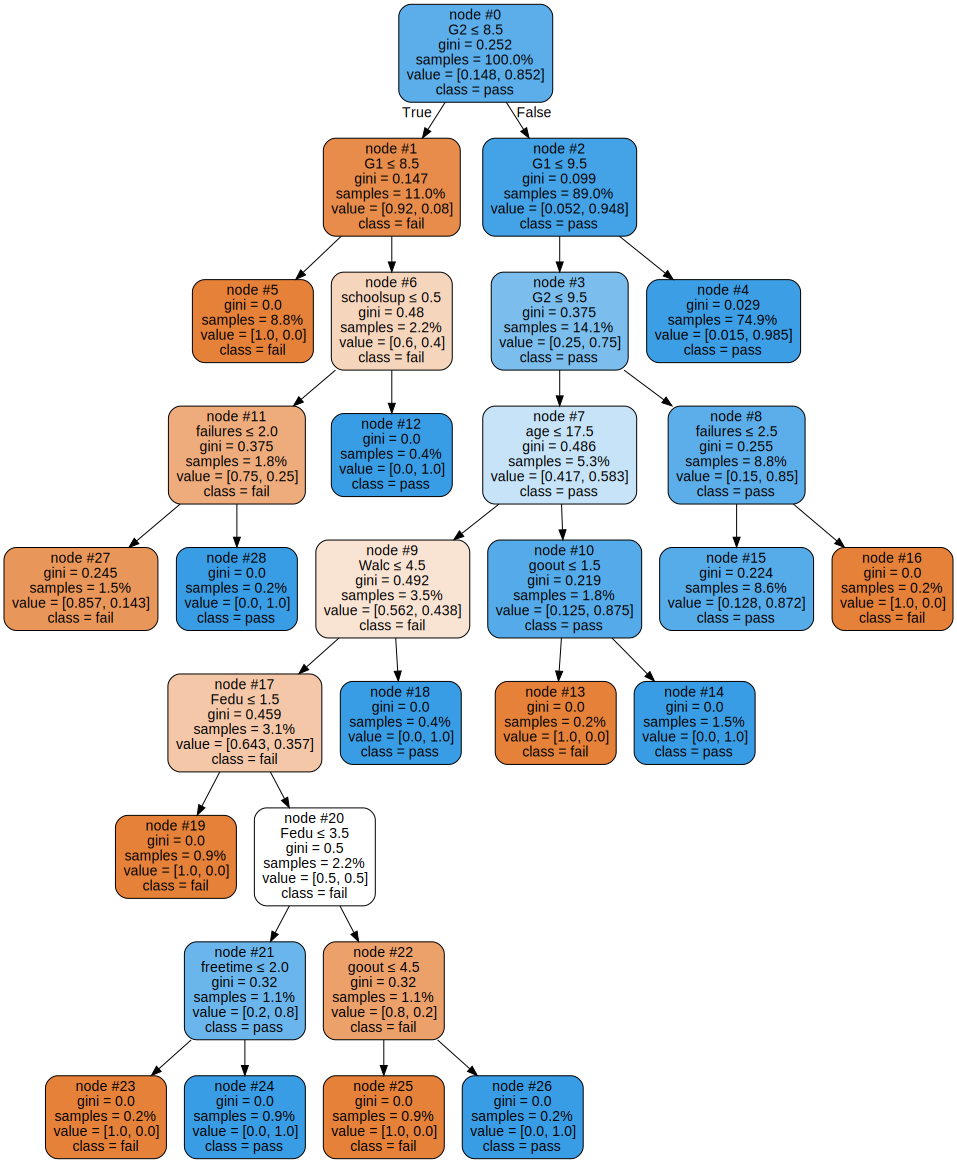

In [30]:
# Imprime graficamente a árvore de português
dot_data = export_graphviz(tree_por_ABIN, 
                          out_file = None,
                          feature_names = df_student_por,
                          class_names = ['fail', 'pass'],
                          filled = True, rounded = True,
                          proportion = True,
                          node_ids = True,
                          rotate = False,
                          label = 'all',
                          special_characters = True)
graph = graphviz.Source(dot_data)
graph

--------------------------------------------------------
### **Gerando regras a partir da árvore de decisão**

In [31]:
# Função para extrair as regras
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"{name} <= {np.round(threshold, 3)}"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"{name} > {np.round(threshold, 3)}"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = ""
        
        for p in path[:-1]:
            if rule != "":
                rule += " & "
            rule += str(p)
        rule += " => "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"{class_names[l].upper()}"
        #rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

* Extraindo regras a partir da árvore de matemática

In [32]:
# Extraindo regras de matemática
rules_mat = get_rules(tree_mat_ABIN, ['Sexo', 'Idade', 'EducacaoDaMae', 'EducacaoDoPai', 'TempoDeEstudo', 'Reprovacoes',
                                        'SuporteEscolar', 'SuporteFamiliar', 'Internet', 'TempoLivre', 'SairComAmigos',
                                        'ConsumoAlcool', 'Saude', 'Nota1', 'Nota2'], ['FAIL','PASS'])
for r in rules_mat:
    print(r)

Nota2 > 9.5 & Nota1 > 10.5 => PASS
Nota2 <= 9.5 & Nota2 <= 8.5 => FAIL
Nota2 > 9.5 & Nota1 <= 10.5 & Idade <= 17.5 & EducacaoDaMae > 1.5 => PASS
Nota2 <= 9.5 & Nota2 > 8.5 & EducacaoDoPai > 2.5 & SairComAmigos > 2.5 => FAIL
Nota2 <= 9.5 & Nota2 > 8.5 & EducacaoDoPai <= 2.5 & SairComAmigos > 2.5 & SuporteFamiliar <= 0.5 & TempoDeEstudo <= 3.5 => PASS
Nota2 > 9.5 & Nota1 <= 10.5 & Idade <= 17.5 & EducacaoDaMae <= 1.5 => PASS
Nota2 <= 9.5 & Nota2 > 8.5 & EducacaoDoPai <= 2.5 & SairComAmigos <= 2.5 => FAIL
Nota2 > 9.5 & Nota1 <= 10.5 & Idade > 17.5 & SuporteFamiliar > 0.5 => FAIL
Nota2 > 9.5 & Nota1 <= 10.5 & Idade > 17.5 & SuporteFamiliar <= 0.5 => PASS
Nota2 <= 9.5 & Nota2 > 8.5 & EducacaoDoPai > 2.5 & SairComAmigos <= 2.5 & Nota1 <= 9.5 => PASS
Nota2 <= 9.5 & Nota2 > 8.5 & EducacaoDoPai <= 2.5 & SairComAmigos > 2.5 & SuporteFamiliar > 0.5 & Nota1 > 8.5 & TempoDeEstudo > 1.5 => PASS
Nota2 <= 9.5 & Nota2 > 8.5 & EducacaoDoPai <= 2.5 & SairComAmigos > 2.5 & SuporteFamiliar > 0.5 & Nota1 <=

* Extraindo regras a partir da árvore de português

In [33]:
# Extraindo regras de português
rules_por = get_rules(tree_por_ABIN, ['Sexo', 'Idade', 'EducacaoDaMae', 'EducacaoDoPai', 'TempoDeEstudo', 'Reprovacoes',
                                        'SuporteEscolar', 'SuporteFamiliar', 'Internet', 'TempoLivre', 'SairComAmigos',
                                        'ConsumoAlcool', 'Saude', 'Nota1', 'Nota2'], ['FAIL','PASS'])
for r in rules_por:
    print(r)

Nota2 > 8.5 & Nota1 > 9.5 => PASS
Nota2 <= 8.5 & Nota1 <= 8.5 => FAIL
Nota2 > 8.5 & Nota1 <= 9.5 & Nota2 > 9.5 & Reprovacoes <= 2.5 => PASS
Nota2 > 8.5 & Nota1 <= 9.5 & Nota2 <= 9.5 & Idade > 17.5 & SairComAmigos > 1.5 => PASS
Nota2 <= 8.5 & Nota1 > 8.5 & SuporteEscolar <= 0.5 & Reprovacoes <= 2.0 => FAIL
Nota2 > 8.5 & Nota1 <= 9.5 & Nota2 <= 9.5 & Idade <= 17.5 & ConsumoAlcool <= 4.5 & EducacaoDoPai > 1.5 & EducacaoDoPai > 3.5 & SairComAmigos <= 4.5 => FAIL
Nota2 > 8.5 & Nota1 <= 9.5 & Nota2 <= 9.5 & Idade <= 17.5 & ConsumoAlcool <= 4.5 & EducacaoDoPai > 1.5 & EducacaoDoPai <= 3.5 & TempoLivre > 2.0 => PASS
Nota2 > 8.5 & Nota1 <= 9.5 & Nota2 <= 9.5 & Idade <= 17.5 & ConsumoAlcool <= 4.5 & EducacaoDoPai <= 1.5 => FAIL
Nota2 > 8.5 & Nota1 <= 9.5 & Nota2 <= 9.5 & Idade <= 17.5 & ConsumoAlcool > 4.5 => PASS
Nota2 <= 8.5 & Nota1 > 8.5 & SuporteEscolar > 0.5 => PASS
Nota2 > 8.5 & Nota1 <= 9.5 & Nota2 > 9.5 & Reprovacoes > 2.5 => FAIL
Nota2 > 8.5 & Nota1 <= 9.5 & Nota2 <= 9.5 & Idade > 17.5 

### Formatação das regras para integração com o motor de inferência

* Formatação das regras de português

In [34]:
# Tratamento de português para formato padrão
formated_rules_port = []
aux = []
for s in rules_por:
    aux = s
    if ".5" in aux:
        aux = aux.replace('.5','')
    if ".0" in aux:
        aux = aux.replace('.0','')
    if " >= " in aux:
        aux = aux.replace(' >= ','_MAIOR_IGUAL_')
    if " < " in aux:
        aux = aux.replace(' < ','_MENOR_')
    if " <= " in aux:
        aux = aux.replace(' <= ','_MENOR_IGUAL_')
    if " > " in aux:
        aux = aux.replace(' > ','_MAIOR_')
    formated_rules_port.append(aux)

with open('../data/base_regras_port.txt','w') as arq:
    for s in formated_rules_port:
        arq.write(str(s)+'\n')

* Formatação das regras de matemática

In [35]:
# Tratamento de matemática para formato padrão
formated_rules_mat = []
aux = []
for s in rules_mat:
    aux = s
    if ".5" in aux:
        aux = aux.replace('.5','')
    if ".0" in aux:
        aux = aux.replace('.0','')
    if " >= " in aux:
        aux = aux.replace(' >= ','_MAIOR_IGUAL_')
    if " < " in aux:
        aux = aux.replace(' < ','_MENOR_')
    if " <= " in aux:
        aux = aux.replace(' <= ','_MENOR_IGUAL_')
    if " > " in aux:
        aux = aux.replace(' > ','_MAIOR_')
    formated_rules_mat.append(aux)
    
with open('../data/base_regras_mat.txt','w') as arq:
    for s in formated_rules_mat:
        arq.write(str(s)+'\n')